In [4]:
import numpy as np
import os
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the path to the image files
path = '/Users/gogamid/master/semester-2/machine-learning/FashionMNIST/'
filenames = os.listdir(path)

# Initialize empty lists to store the data and labels
X = []
T = []

# Loop through the filenames and parse the labels
for filename in filenames:
    # Read in the image data
    img = imageio.imread(os.path.join(path, filename))
    X.append(img)

    # Get the label from the filename
    id_ = int(filename.split('-')[0][-1])
    T.append(id_)

#labels -> one-hot encoded labels
T = np.eye(10)[T]

# data and labels -> numpy arrays
X = np.array(X)
T = np.array(T)
print(T[0])
print(X[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 11 12 15  3  0  0  0  0  0  0
   0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7 12 20 49 38 10 27  0  0  0  0  0  0
   4

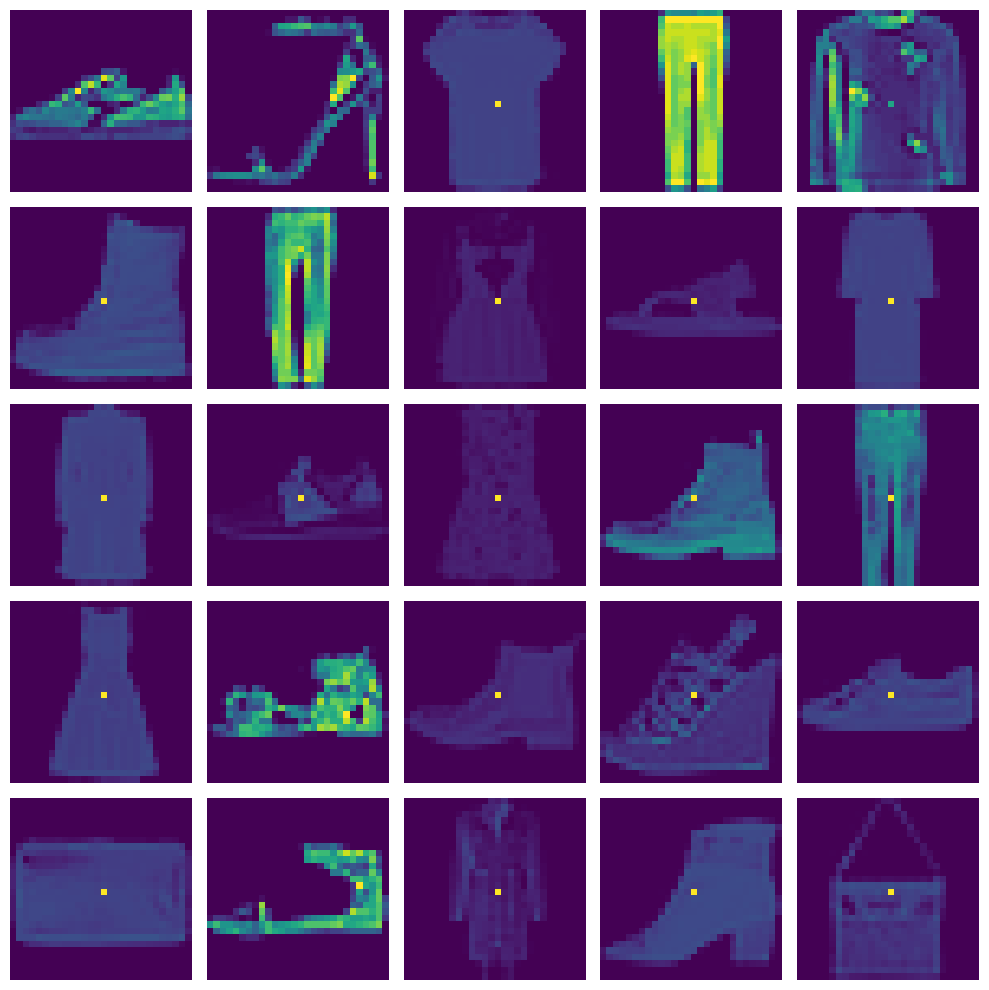

In [5]:
# Visualize the first 50 images BEFORE
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.ravel()
for i in range(25):
    axs[i].imshow(X[i])
    axs[i].axis('off')
plt.tight_layout()


[  0   0 226 ... 231 139 230]
The most distributed pixel value is:  0   16667


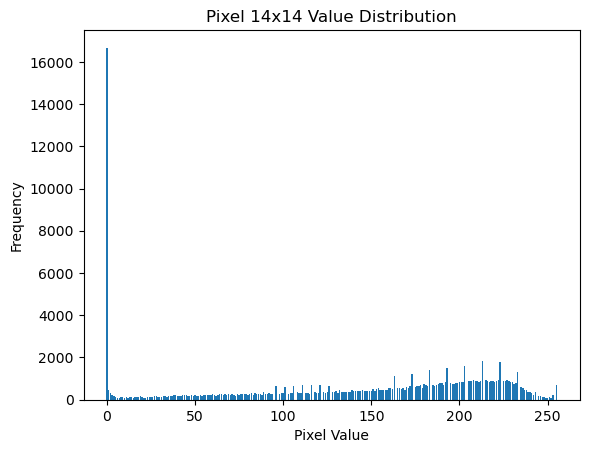

In [6]:
# Flatten the image array
pixel_values = X[:, 14, 14].flatten()
print(pixel_values)

# bar
unique, counts = np.unique(pixel_values, return_counts=True)
max_index = np.argmax(counts)
max_pixel_value = unique[max_index]
print("The most distributed pixel value is: ", max_pixel_value, " ", counts[max_index])
plt.bar(unique, counts)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel 14x14 Value Distribution')
plt.show()

In [7]:
#Problem 1: dot at pixel 14x14 -> change average of 4 neighboring pixels
for i in range(X.shape[0]):
    x, y = 14, 14
    X[i][x][y] = (X[i][x-1][y] + X[i][x+1][y] + X[i][x][y-1] + X[i][x][y+1])/4


[ 6  0 45 ... 23 28 23]
The most distributed pixel value is:  0   6991


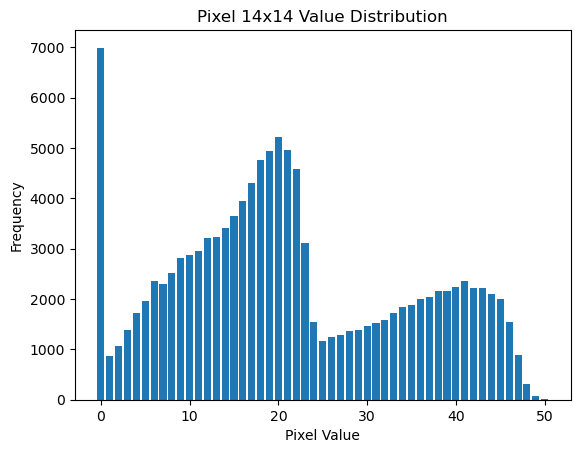

In [8]:
# Flatten the image array
pixel_values = X[:, 14, 14].flatten()
print(pixel_values)

# bar
unique, counts = np.unique(pixel_values, return_counts=True)
max_index = np.argmax(counts)
max_pixel_value = unique[max_index]
print("The most distributed pixel value is: ", max_pixel_value, " ", counts[max_index])
plt.bar(unique, counts)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel 14x14 Value Distribution')
plt.show()

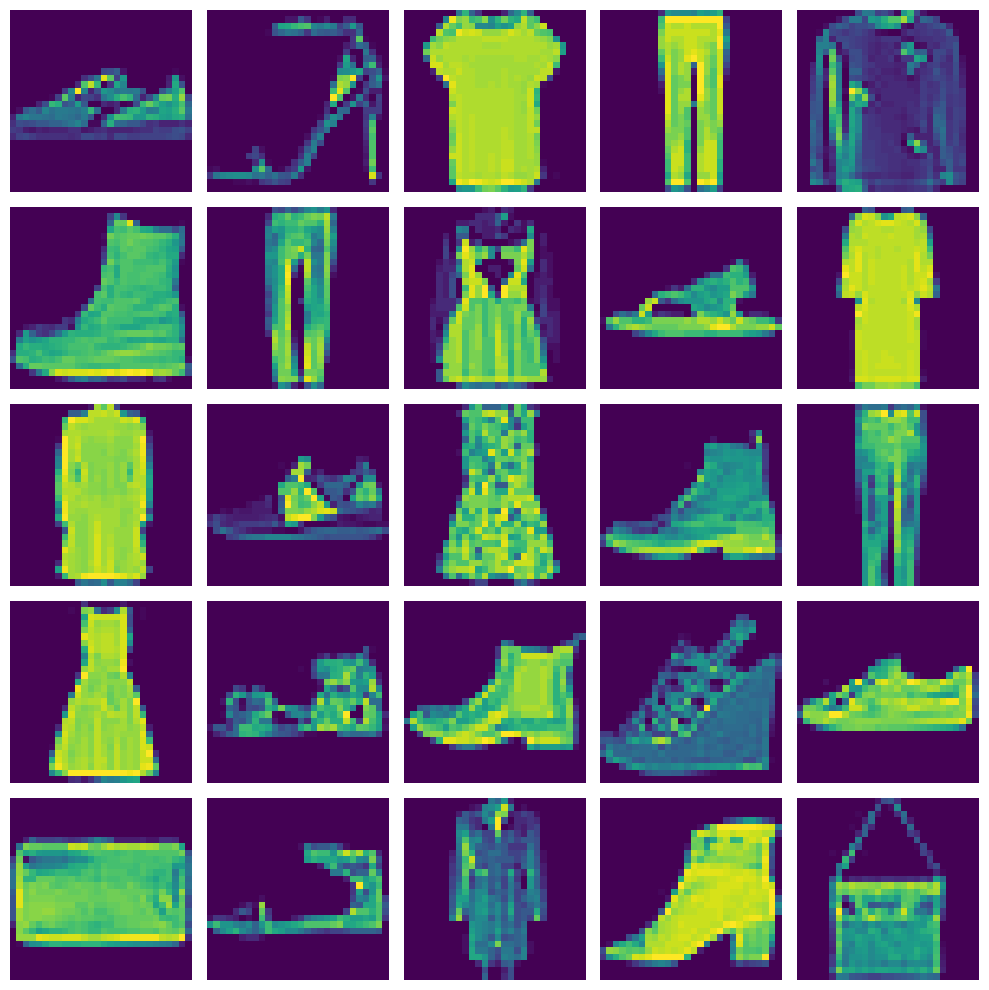

In [9]:
# Visualize the first 25 images AFTER
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.ravel()
for i in range(25):
    axs[i].imshow(X[i])
    axs[i].axis('off')
plt.tight_layout()

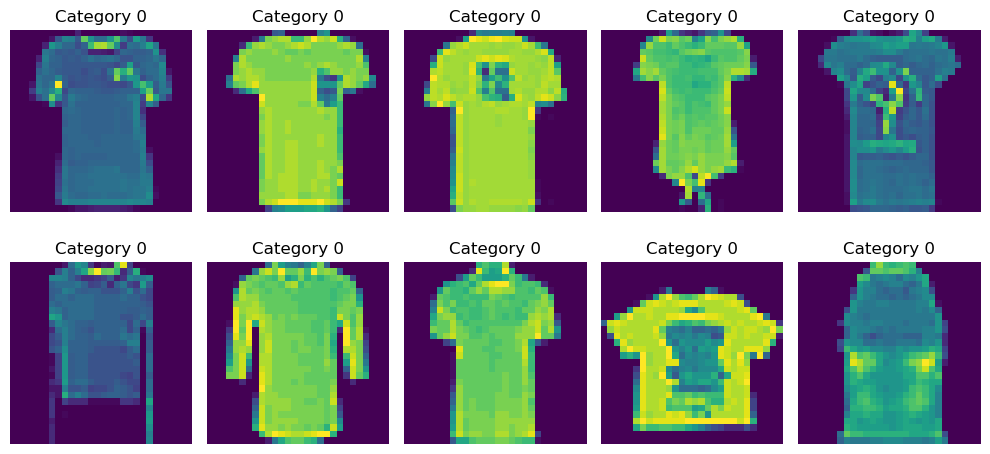

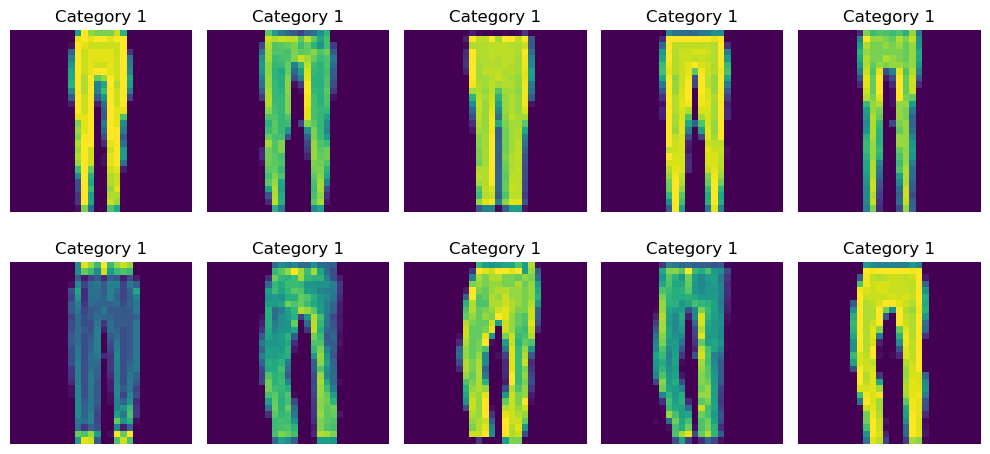

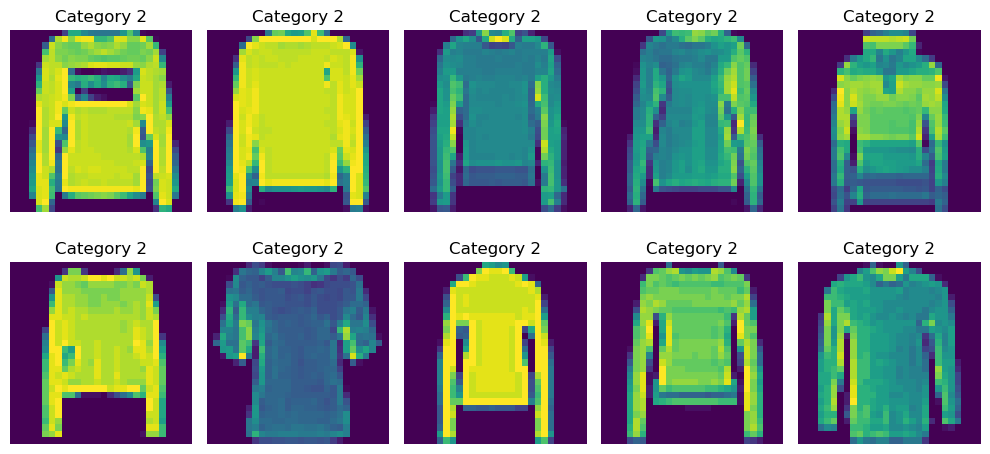

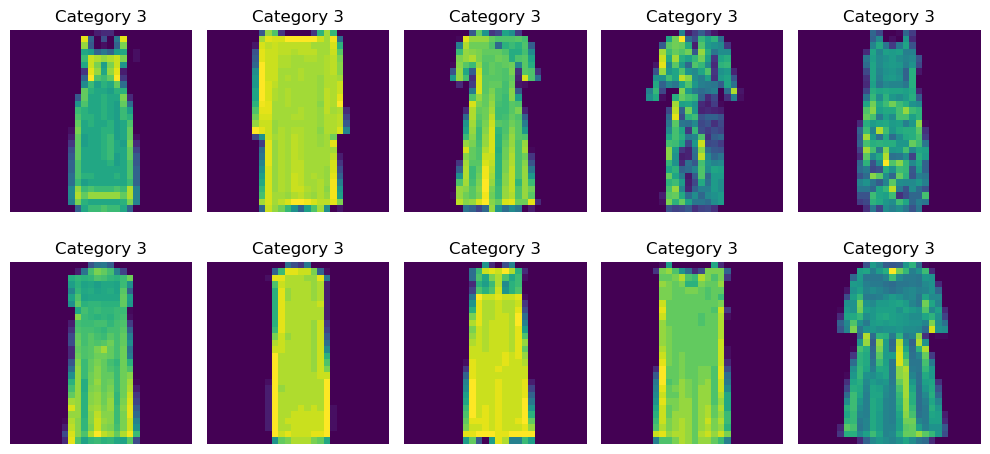

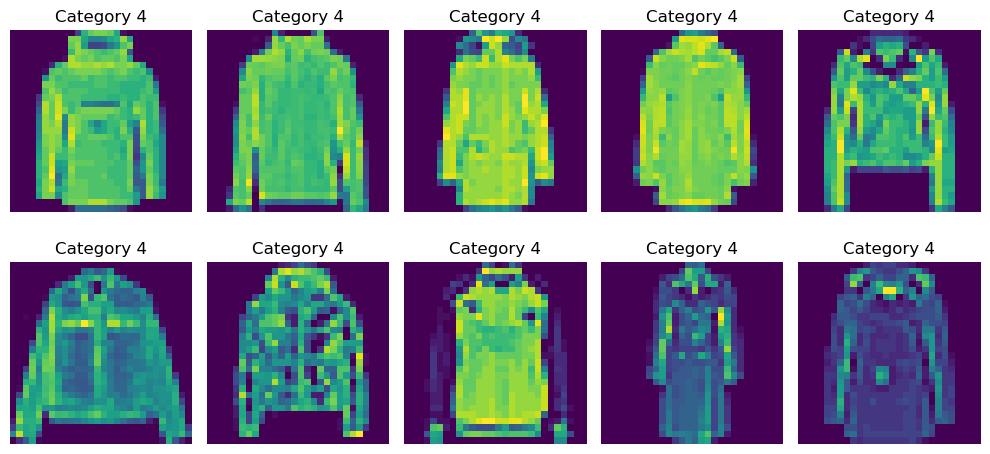

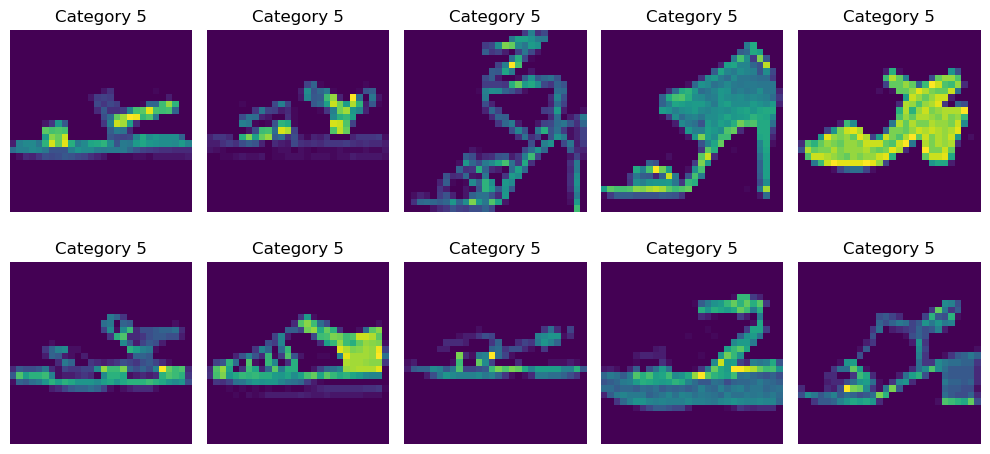

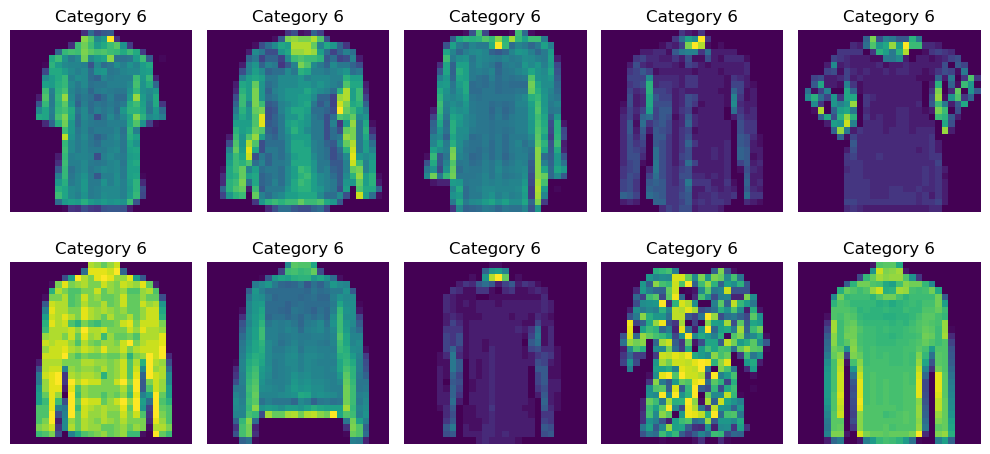

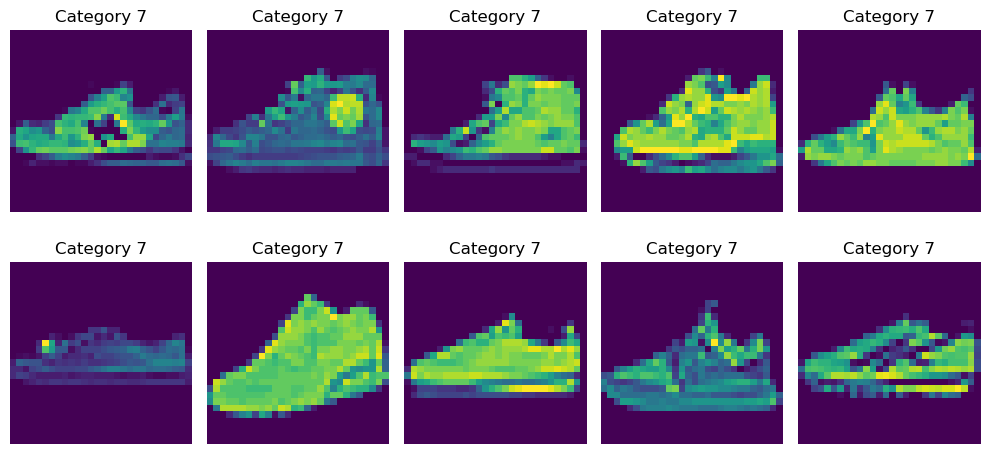

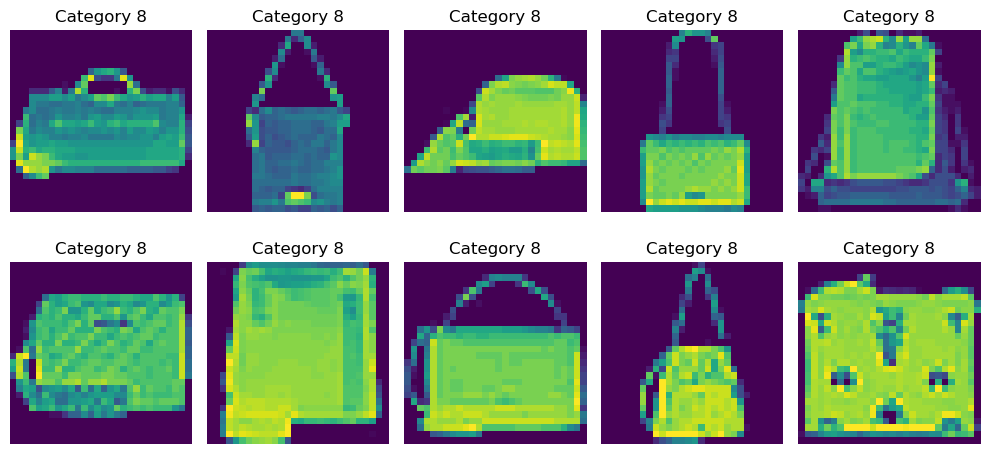

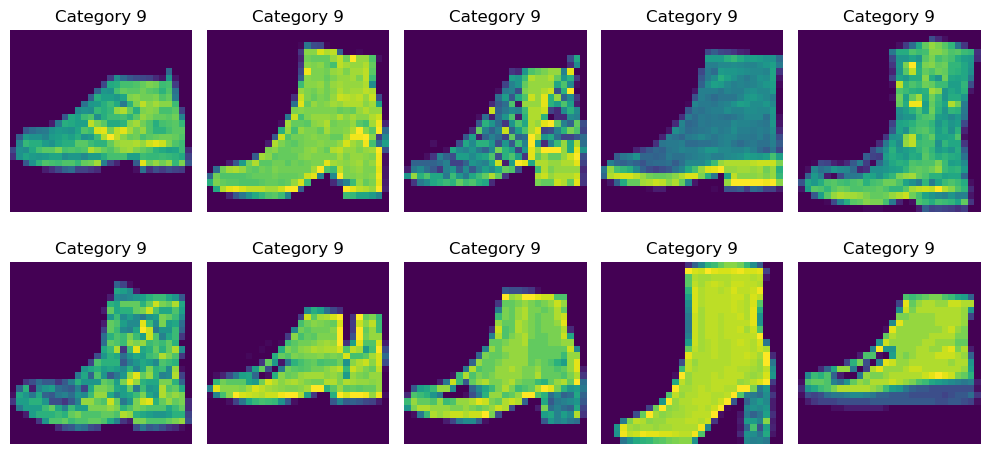

In [10]:
#display 10 images of all classes
import random

for category in range(10):
    # Create a figure with 2 rows and 5 columns of subplots
    fig, axs = plt.subplots(2, 5, figsize=(10, 5))
    axs = axs.ravel()
    # axs.set_title("Category %" % category)

    # Get the indices of all images of class 0
    class_0_indices = np.where(T[:,category]==1)[0]

    # Shuffle the indices of the images of class 0
    random.shuffle(class_0_indices)

    # Loop through the first 10 images of class 0
    for i in range(10):
        axs[i].imshow(X[class_0_indices[i]])
        axs[i].axis('off')
        axs[i].set_title(f"Category {category}")

    plt.tight_layout()

[ 3091. 13157. 13146. 13114. 13111. 13173. 13172. 13134. 13198. 13155.]


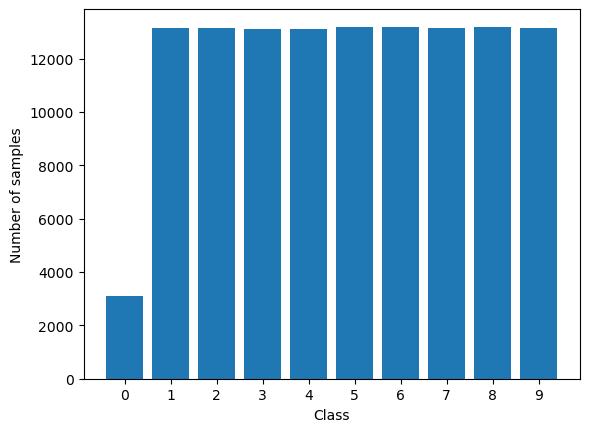

In [11]:
# Count the number of samples for each class
class_counts = np.sum(T, axis=0)
print(class_counts)
# Visualize the distribution of the labels
class_counts = np.sum(T, axis=0)
plt.bar(np.arange(10), class_counts)
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.xticks(np.arange(10))
plt.show()

In [12]:
import random
from keras.utils import to_categorical
import  numpy as np

class_labels = np.argmax(T, axis=1)
print(class_labels)

max_samples = np.max([np.sum(class_labels == i) for i in range(10)])

X_resampled = []
class_labels_resampled = []

# Iterate over each class
for i in range(10):
    class_samples = X[class_labels == i]
    class_samples_labels = class_labels[class_labels == i]
    # Shuffle the class samples and labels
    np.random.shuffle(class_samples)
    np.random.shuffle(class_samples_labels)
    # Select the maximum number of samples from the shuffled class
    class_samples_resampled = random.choices(class_samples, k=max_samples)
    class_samples_labels_resampled = random.choices(class_samples_labels, k=max_samples)
    X_resampled.append(class_samples_resampled)
    class_labels_resampled.append(class_samples_labels_resampled)

# Stack the resampled classes to create the final dataset
X_resampled = np.vstack(X_resampled)
class_labels_resampled = np.hstack(class_labels_resampled)
T_resampled = to_categorical(class_labels_resampled)
print(T_resampled.shape)
print(X_resampled.shape)

[7 5 6 ... 6 9 4]
(131980, 10)
(131980, 28, 28)


In [13]:
# # Problem 2: distribution of class 0 is less than others-> we can equalize all classes with max
# from sklearn.utils import resample
# from keras.utils import to_categorical
#
# class_labels = np.argmax(T, axis=1)
# print(class_labels)
#
# max_samples = np.max([np.sum(class_labels == i) for i in range(10)])
#
# X_resampled = []
# class_labels_resampled = []
#
# # Iterate over each class
# for i in range(10):
#     class_samples = X[class_labels == i]
#     class_samples_labels = class_labels[class_labels == i]
#     # Resample the class to match the maximum number of samples
#     class_samples_resampled, class_samples_labels_resampled = resample(class_samples, class_samples_labels,
#                                                                        replace=True, n_samples=max_samples,
#                                                                        random_state=42)
#     X_resampled.append(class_samples_resampled)
#     class_labels_resampled.append(class_samples_labels_resampled)
#
# # Stack the resampled classes to create the final dataset
# X_resampled = np.vstack(X_resampled)
# class_labels_resampled = np.hstack(class_labels_resampled)
# T_resampled = to_categorical(class_labels_resampled)
# print(T_resampled.shape)
# print(X_resampled.shape)

[13198. 13198. 13198. 13198. 13198. 13198. 13198. 13198. 13198. 13198.]


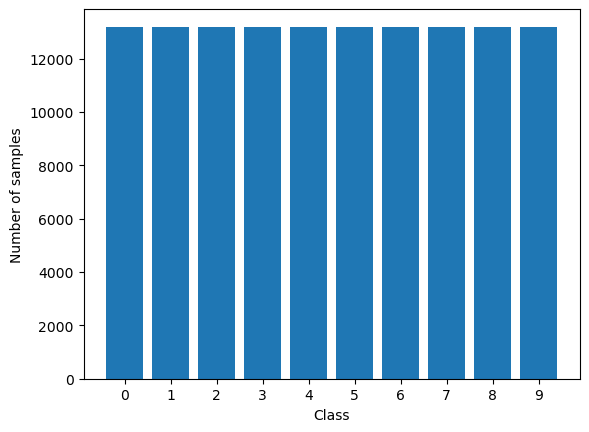

In [14]:
# Count the number of samples for each class
class_counts = np.sum(T_resampled, axis=0)
print(class_counts)
plt.bar(np.arange(10), class_counts)
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.xticks(np.arange(10))
plt.show()

In [15]:
import tensorflow as tf;

# reshape the data to (samples, rows, columns, channels)
X_resampled = X_resampled.astype('float32').reshape(-1, 28, 28, 1)

# split the data into training and testing sets
X_train, X_test, T_train, T_test = train_test_split(X_resampled, T_resampled, test_size=0.2, random_state=42)

# create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, 3))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Conv2D(64, 4))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Reshape(target_shape=(25*64,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Softmax())

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

# train the model with the corrected data
model.fit(X_train, T_train, epochs=10, batch_size=100)
model.save_weights("cnn")

# evaluate the model on the test data
class_acc = model.evaluate(x=X_test, y=T_test)
print("classification error on test is ", class_acc)

Metal device set to: Apple M1 Pro


2023-02-19 22:36:23.772693: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-19 22:36:23.772832: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-02-19 22:36:24.257844: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-19 22:36:25.044433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1056/1056 [==============================] - 23s 19ms/step - loss: 0.5547 - categorical_accuracy: 0.8303
Epoch 2/10
1056/1056 [==============================] - 20s 19ms/step - loss: 0.3485 - categorical_accuracy: 0.8723
Epoch 3/10
1056/1056 [==============================] - 19s 18ms/step - loss: 0.3361 - categorical_accuracy: 0.8796
Epoch 4/10
1056/1056 [==============================] - 20s 19ms/step - loss: 0.3285 - categorical_accuracy: 0.8819
Epoch 5/10
1056/1056 [==============================] - 19s 18ms/step - loss: 0.3319 - categorical_accuracy: 0.8825
Epoch 6/10
1056/1056 [==============================] - 20s 19ms/step - loss: 0.3156 - categorical_accuracy: 0.8880
Epoch 7/10
1056/1056 [==============================] - 19s 18ms/step - loss: 0.3088 - categorical_accuracy: 0.8903
Epoch 8/10
1056/1056 [==============================] - 19s 18ms/step - loss: 0.2976 - categorical_accuracy: 0.8948
Epoch 9/10
1056/1056 [==============================] - 20s 19ms/step - loss: 0.301

2023-02-19 22:39:42.875024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


825/825 [==============================] - 7s 8ms/step - loss: 0.3636 - categorical_accuracy: 0.8803
classification error on test is  [0.36362671852111816, 0.8803228139877319]


In [16]:
Y_test = model.predict(X_test)
print(Y_test[0], T_test[0])

 49/825 [>.............................] - ETA: 2s

2023-02-19 22:39:49.733506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


825/825 [==============================] - 3s 3ms/step
[8.5927594e-01 8.4671456e-06 3.7731684e-03 8.0469484e-04 8.2511370e-08
 1.9647545e-07 1.3612713e-01 3.1731039e-12 1.0328902e-05 3.9845182e-14] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
# Confusion matrix without for loop. When values are only in diagonal, it means accuracy is 100%.
T_index = np.argmax(T_test, axis=1)
Y_index = np.argmax(Y_test, axis=1)

matrix = np.zeros(shape=(10,10))
np.add.at(matrix, (T_index, Y_index), 1)
print(matrix.astype('int32'))

[[2037    1    4   30    1    0  607    0    1    0]
 [   5 2561    3   25    4    0   21    0    1    0]
 [  10    1 2006   12  386    0  266    0    2    0]
 [  37   13    3 2219  204    0  152    0    1    0]
 [   1    0  156   19 2287    0  161    0    2    0]
 [   0    0    0    0    0 2582   12   86    7    7]
 [ 169    0  139   38  229    0 1975    0    3    0]
 [   0    0    0    0    0   13    5 2597    1   44]
 [   7    1    3    4   13    4  104    5 2448    0]
 [   0    0    0    0    0   20   14  102    0 2525]]


In [18]:

num_classes = len(np.unique(T_index))
confusion_matrix = np.zeros((num_classes, num_classes))

confusion_matrix[T_index, Y_index] += 1

print(confusion_matrix)

[[1. 1. 1. 1. 1. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 1. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]]
